In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import json

from stable_baselines.results_plotter import load_results, ts2xy

In [2]:
# Utility functions for plotting reward
def smoothen_reward(reward, window):
    # Until window length, take cummulative average
    p1 = np.cumsum(reward[:window-1]) / (1+np.arange(window-1))
    # From window length, take moving average
    p2 = np.convolve(reward, np.ones(window), 'valid') / window
    
    return np.hstack((p1,p2))
    

In [3]:
log_dir = "./zoo/DQN.MlpPolicy"
train_logs = glob.glob("{}/*.csv".format(log_dir))

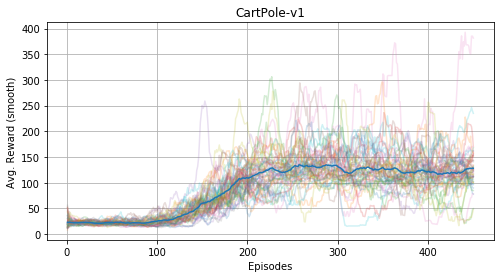

In [4]:
fig = plt.figure(figsize=(8,4))

# Get experiment name from log files
with open(train_logs[0], 'rt') as fh:
    first_line = fh.readline()
    assert first_line[0] == "#"
    header = json.loads(first_line[1:])

# Consolidate and plot data
run_data = None
for log in train_logs:
    monitor_file = log
    this_run_data = np.genfromtxt(monitor_file, delimiter=",", skip_header=2)[:,0]  # First column is the reward
    smooth_rew = smoothen_reward(this_run_data, 10)
    
    # Plot this run rewards per episode
    plt.plot(1+np.arange(len(smooth_rew)), smooth_rew, alpha=0.2)
    
    if run_data is not None:
        run_data = np.vstack((run_data, smooth_rew[:475]))
    else:
        run_data = smooth_rew[:475]

run_data_mean = np.mean(run_data, axis=0)

plt.plot(1+np.arange(len(run_data_mean)), run_data_mean)
plt.xlabel("Episodes")
plt.ylabel("Avg. Reward (smooth)")
plt.title(header["env_id"])
plt.grid()